# Todo
1. change the loading data
2. change N2

In [9]:
library(plyr)
library(ggplot2)
load('random_splitting_2.Rdata')

In [10]:
theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'bottom')

In [11]:
N2 = 36
SIG = 0.3200759
baseline = sqrt(qchisq(p = 0.95, df = N2) / N2) * SIG

In [5]:
adaptive = ddply(summary_adaptive_single, .(b, s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N2)), coverage = mean(coverage))
Stein_radius = ddply(summary_radius_stein_single, .(b, s, lam1Type, method, design), summarise, 
                            r = mean(exp(logVol / N2)), coverage = mean(coverage))
dataset1 = rbind(adaptive, Stein_vol)
dataset1$method[dataset1$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset1$method = factor(dataset1$method, levels = c('adaptive', 'two-step stein'))
dataset1$lam1Type = factor(dataset1$lam1Type, levels = c('val', 'cv', '1se'))

Stein_vol['c'] = 'vol'
Stein_radius['c'] = 'radius'
dataset2 = rbind(Stein_vol, Stein_radius)
dataset2$method[dataset2$method == 'twoStepSteinVolume'] = 'two-step stein (volume)'
dataset2$method[dataset2$method == 'twoStepSteinRadius'] = 'two-step stein (diameter)'
dataset2$method = factor(dataset2$method, levels = c('two-step stein (volume)', 'two-step stein (diameter)'))
dataset2$lam1Type = factor(dataset2$lam1Type, levels = c('val', 'cv', '1se'))

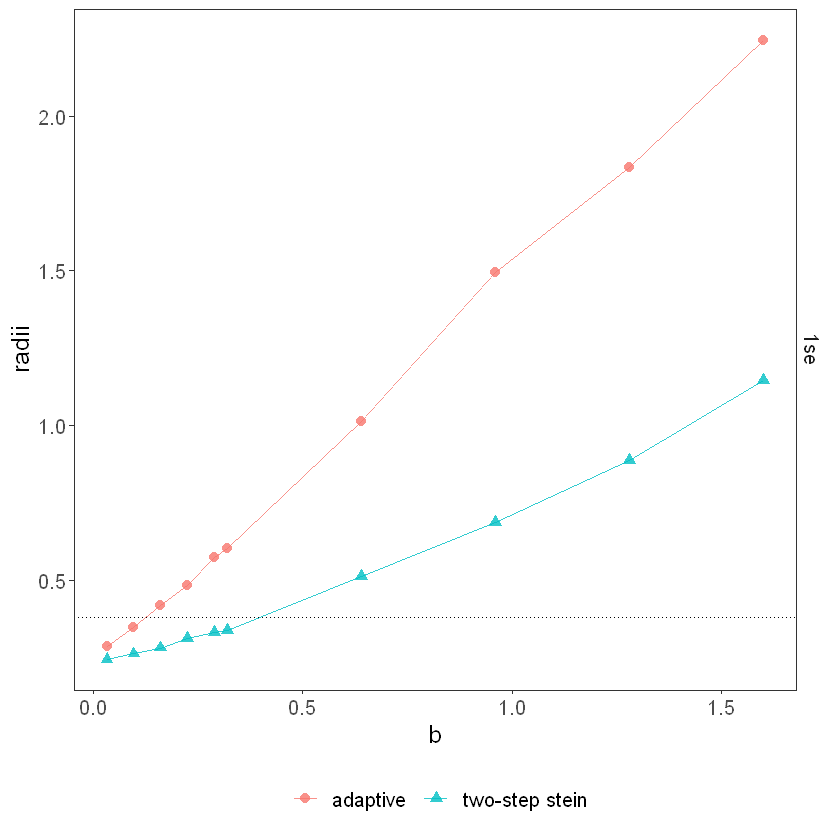

In [18]:
ggplot(data = dataset1, aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(lam1Type ~ ., scales="free_y") + 
  ylab('radii') + 
  theme_settings

# ggsave('r_single_A_random_splitting.pdf', width = 6.67, height = 6.67, units = 'in')

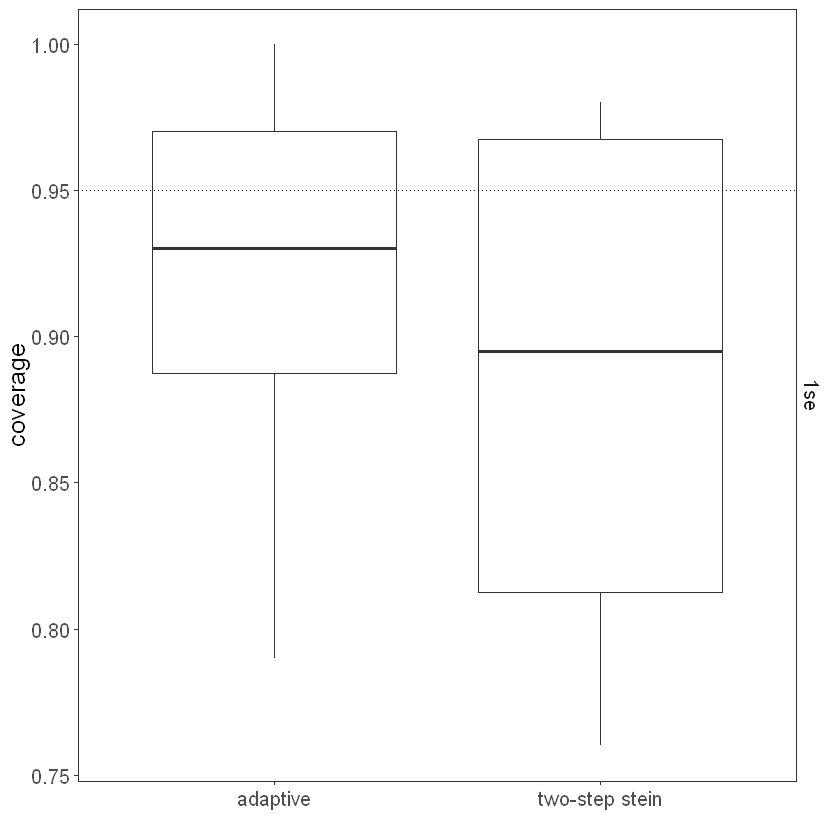

In [19]:
ggplot(data = dataset1, aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  xlab('') + 
  theme_settings +
#   coord_cartesian(ylim = c(0.75, 1)) +
  facet_grid(lam1Type~.) + 
  geom_hline(yintercept = 0.95, linetype = 3)

# ggsave('coverage2_single_A_random_splitting.pdf', width = 6.67, height = 6.67, units = 'in')

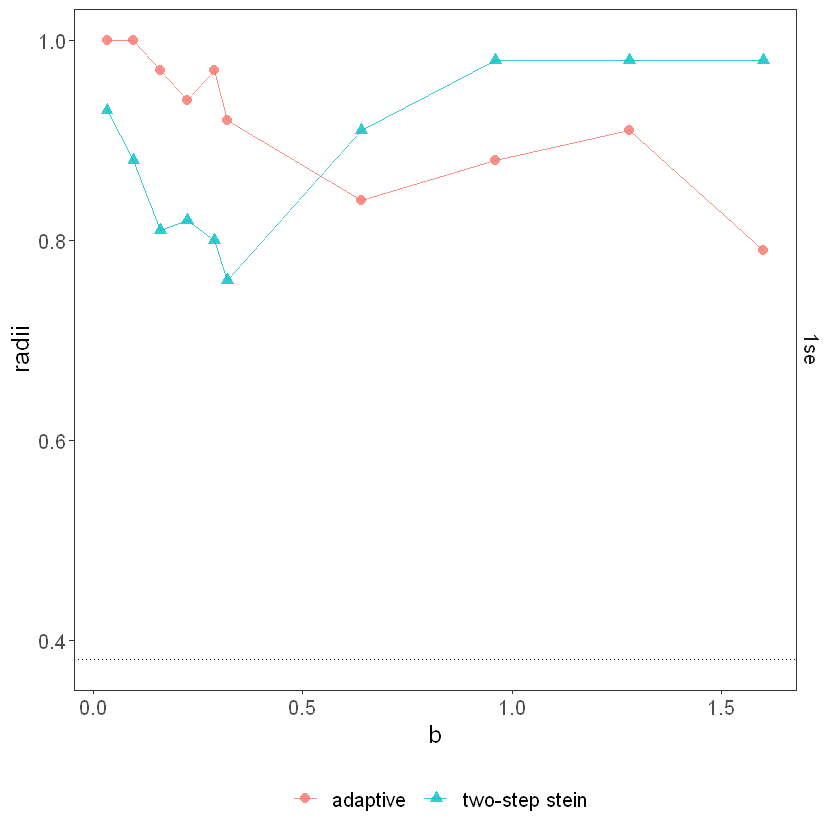

In [6]:
ggplot(data = dataset1, aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = baseline, linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(lam1Type ~ ., scales="free_y") + 
  ylab('radii') + 
  theme_settings

ggsave('coverage_line_single_A_random_splitting.pdf', width = 6.67, height = 6.67, units = 'in')

In [24]:
# summaryize b< 1*sigma
SIG = 0.3200759

In [40]:
load('random_splitting.Rdata')
N2 = 36
baseline = sqrt(qchisq(p = 0.95, df = N2) / N2) * SIG

summary_adaptive_random = summary_adaptive_single
adaptive_random = ddply(summary_adaptive_random[summary_adaptive_random['b'] <= (SIG + 0.01),], 
                        .(s, lam1Type, method, design), summarise, 
                        r = mean(r), coverage = mean(coverage))
print("adaptive_random")
print(adaptive_random)

summary_volume_stein_random = summary_volume_stein_single
Stein_vol_random = ddply(summary_volume_stein_random[summary_volume_stein_random['b'] <= (SIG + 0.01),], 
                         .(s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N2)), r_s = mean(r_s), r_w = mean(r_w),
                         coverage = mean(coverage))
print("Stein_vol_random")
print(Stein_vol_random)

[1] "adaptive_random"
   s lam1Type   method     design         r  coverage
1 14      1se adaptive clustering 0.4533255 0.9666667
[1] "Stein_vol_random"
   s lam1Type             method     design         r       r_s       r_w
1 14      1se twoStepSteinVolume clustering 0.2958621 0.2788084 0.2871465
   coverage
1 0.8333333


In [41]:
load('clustering_X1_X2.Rdata')
N2 = 27
baseline = sqrt(qchisq(p = 0.95, df = N2) / N2) * SIG

summary_adaptive_X1_X2 = summary_adaptive_single
adaptive_X1_X2 = ddply(summary_adaptive_X1_X2[summary_adaptive_X1_X2['b'] <= (SIG + 0.01),], 
                        .(s, lam1Type, method, design), summarise, 
                        r = mean(r), coverage = mean(coverage))
print("adaptive_X1_X2")
print(adaptive_X1_X2)

summary_volume_stein_X1_X2 = summary_volume_stein_single
Stein_vol_X1_X2 = ddply(summary_volume_stein_X1_X2[summary_volume_stein_X1_X2['b'] <= (SIG + 0.01),], 
                         .(s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N2)), r_s = mean(r_s), r_w = mean(r_w),
                         coverage = mean(coverage))
print("Stein_vol_X1_X2")
print(Stein_vol_X1_X2)

[1] "adaptive_X1_X2"
   s lam1Type   method     design         r  coverage
1 14      1se adaptive clustering 0.4228510 0.9883333
2 14       cv adaptive clustering 0.4096093 0.9933333
3 14      val adaptive clustering 0.3889005 0.9883333
[1] "Stein_vol_X1_X2"
   s lam1Type             method     design         r       r_s       r_w
1 14      1se twoStepSteinVolume clustering 0.2936884 0.3979633 0.2897958
2 14       cv twoStepSteinVolume clustering 0.2959259 0.4363770 0.2874499
3 14      val twoStepSteinVolume clustering 0.3052488 0.4564724 0.2815205
   coverage
1 0.9650000
2 0.9716667
3 0.9683333


In [ ]:
summary_

In [11]:
load('clustering_X2_X1.Rdata')
N2 = 44
baseline = sqrt(qchisq(p = 0.95, df = N2) / N2) * SIG

summary_adaptive_X2_X1 = summary_adaptive_single
adaptive_X2_X1 = ddply(summary_adaptive_X2_X1[summary_adaptive_X2_X1['b'] <= (SIG + 0.001),], 
                        .(s, lam1Type, method, design), summarise, 
                        r = mean(r), coverage = mean(coverage))
print("adaptive_X2_X1")
print(adaptive_X2_X1)

summary_volume_stein_X2_X1 = summary_volume_stein_single
Stein_vol_X2_X1 = ddply(summary_volume_stein_X2_X1[summary_volume_stein_X2_X1['b'] <= (SIG + 0.001),], 
                         .(s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / N2)), r_s = mean(r_s), r_w = mean(r_w),
                         coverage = mean(coverage))
print("Stein_vol_X2_X1")
print(Stein_vol_X2_X1)

[1] "adaptive_X2_X1"
   s lam1Type   method     design         r  coverage
1 14      1se adaptive clustering 0.4392584 0.9733333
2 14       cv adaptive clustering 0.3900921 0.9783333
3 14      val adaptive clustering 0.3724730 0.9783333
[1] "Stein_vol_X2_X1"
   s lam1Type             method     design         r       r_s       r_w
1 14      1se twoStepSteinVolume clustering 0.2560704 0.2905099 0.2550817
2 14       cv twoStepSteinVolume clustering 0.2584537 0.3123683 0.2560234
3 14      val twoStepSteinVolume clustering 0.2582016 0.3622105 0.2511059
   coverage
1 0.8916667
2 0.8916667
3 0.8950000


In [12]:
ddply(summary_adaptive_single[summary_adaptive_single$b <= SIG, ], .(s, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage), hsigma = mean(hsigma))

s,lam1Type,method,design,r,coverage,hsigma
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
14,1se,adaptive,clustering,0.4495371,0.9666667,0.2868701


In [15]:
ddply(summary_volume_stein_single[summary_volume_stein_single$b <= SIG, ], .(s, lam1Type, method, design), summarise, 
      r = mean(exp(logVol / N2)), coverage = mean(coverage), hsigma = mean(hsigma),
      r_s = mean(r_s), r_w = mean(r_w)                  
     )

s,lam1Type,method,design,r,coverage,hsigma,r_s,r_w
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,1se,twoStepSteinVolume,clustering,0.2914953,0.79,0.2868701,0.2897567,0.2817882
